In [105]:
# ecuación logística
def newX(x, b):
    newX = b * x * (1 - x)
    return newX

In [106]:
""" Itera numVeces y devuelve una lista con los valores.
    Podemos pasarle un valor de error, que detendrá la iteración 
    si la diferencia entre n y n+1 es menor que la variable error
"""    
def iterate(X, b, numVeces, errorMaximo = 0):
    for i in range(0,numVeces):
        X.append(newX(X[-1],b))
        if errorMaximo != 0 :
            errorEntrePasos = abs(X[-1] - X[-2])
            if  errorEntrePasos < errorMaximo:
                # print('Paro en {} pasos con error = {}'.format(len(X),errorEntrePasos))
                break
    return X

In [107]:
# Convierte una lista de valores en un conjunto (donde no se repiten los valores)
def nonRep(X):
    xNonRep = set()
    for value in X:
        xNonRep.add(value)
    return xNonRep

In [108]:
# print (nonRep(x))

In [109]:
# Redondea los valores de una lista a un número de decimales dado
def roundList(X, numDecimals):
    factor = 10**numDecimals
    roundX = []
    for value in X:
        roundValue = int(value * factor) / factor
        #print('{:10.8f} -> {:10.8f}'.format(value,roundValue))
        roundX.append(roundValue)
    return roundX

In [110]:
# roundList(x,5)

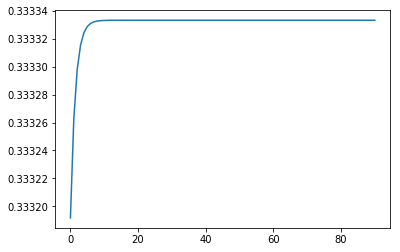

In [111]:
import matplotlib.pyplot as plt
x = [0.75]
b = 1.5
iterate(x,b,100)
plt.plot(x[10:])
plt.show()

In [112]:
# Genera una lista con valores equiespaciados entre minValue y maxValue con paso step
def fRange(minValue, maxValue, paso):
    factor = int(1/paso)
    minInt = int(minValue * factor)
    maxInt = int(maxValue * factor)
    
    # print('min:{} max:{} step:{}'.format(minValue,maxValue,paso))
    # print('min:{} max:{} step:{}'.format(minInt,maxInt ,1)) 
    x = [i/factor for i in range(minInt, maxInt + 1, 1)]
    return x

In [113]:
# fRange(0.8,4,.1)

In [114]:
b = 2.5
numeroDecimales = 7
N = 2*10**numeroDecimales
data = {}
maxNumValues = N // 5
errorMaximo = 10**(-numeroDecimales)
maxData2Show = 100

In [115]:
def explora(minValue,maxValue, paso):
    for b in fRange(minValue, maxValue, paso):
        x = [0.75]
        iterate(x, b, N,errorMaximo = errorMaximo)
        if len(x) < maxNumValues: 
            data[b] = {x[-1]} # el último valor es el correcto
            print('{}->1'.format(b))
        else:
            # resultadoCompleto = nonRep(roundList(x[-maxData2Show:], numeroDecimales))
            resultadoCompleto = nonRep(roundList(x[4*(N//5):], numeroDecimales))
            print('{}->{}'.format(b,len(x)))
            if len(resultadoCompleto) > maxData2Show:
                seleccionados = set()
                contador = 0
                for valor in resultadoCompleto:
                    seleccionados.add(valor)
                    contador += 1
                    if contador > maxData2Show:
                        break
                data[b] = seleccionados
            else:
                data[b]=resultadoCompleto
                
                # print('{}->{}'.format(b,resultado))

In [116]:
def verDatos():
    for valor,resultado in data.items():
        print('{}->{}'.format(valor, len(resultado)))

In [117]:
verDatos()

In [118]:
explora(1,4,0.01)

1.0->1
1.01->1
1.02->1
1.03->1
1.04->1
1.05->1
1.06->1
1.07->1
1.08->1
1.09->1
1.1->1
1.11->1
1.12->1
1.13->1
1.14->1
1.15->1
1.16->1
1.17->1
1.18->1
1.19->1
1.2->1
1.21->1
1.22->1
1.23->1
1.24->1
1.25->1
1.26->1
1.27->1
1.28->1
1.29->1
1.3->1
1.31->1
1.32->1
1.33->1
1.34->1
1.35->1
1.36->1
1.37->1
1.38->1
1.39->1
1.4->1
1.41->1
1.42->1
1.43->1
1.44->1
1.45->1
1.46->1
1.47->1
1.48->1
1.49->1
1.5->1
1.51->1
1.52->1
1.53->1
1.54->1
1.55->1
1.56->1
1.57->1
1.58->1
1.59->1
1.6->1
1.61->1
1.62->1
1.63->1
1.64->1
1.65->1
1.66->1
1.67->1
1.68->1
1.69->1
1.7->1
1.71->1
1.72->1
1.73->1
1.74->1
1.75->1
1.76->1
1.77->1
1.78->1
1.79->1
1.8->1
1.81->1
1.82->1
1.83->1
1.84->1
1.85->1
1.86->1
1.87->1
1.88->1
1.89->1
1.9->1
1.91->1
1.92->1
1.93->1
1.94->1
1.95->1
1.96->1
1.97->1
1.98->1
1.99->1
2.0->1
2.01->1
2.02->1
2.03->1
2.04->1
2.05->1
2.06->1
2.07->1
2.08->1
2.09->1
2.1->1
2.11->1
2.12->1
2.13->1
2.14->1
2.15->1
2.16->1
2.17->1
2.18->1
2.19->1
2.2->1
2.21->1
2.22->1
2.23->1
2.24->1
2.25->1
2.26-

In [119]:
def preparaScatter():
    pX = []
    pY = []
    for ordenada, valores in data.items():
        # print('{}->{}'.format(ordenada,len(valores)))
        cuantosElementos = 0
        for valor in valores:
            pX.append(ordenada)
            pY.append(valor)
            cuantosElementos += 1
            if cuantosElementos > maxData2Show :
                break

    # len(pX)    
    # len(pY)
    return pX,pY
    

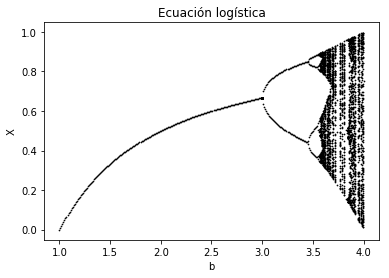

In [120]:
pX,pY = preparaScatter()
plt.scatter(pX,pY,0.5,c='Black')


plt.xlabel('b')
plt.ylabel('X')
plt.title('Ecuación logística')
plt.savefig('images/ecuacionLogistica{}.png'.format(numeroDecimales),transparent = True)
plt.show()

